# Logistic Regression End to End Project with API creation and Deployment on AWS cloud platform.

In [1]:
# importing necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# reading csv file and creating dataframe from it.

df_penguins = pd.read_csv("U:\Data Science Masters Program\Daywise Practice\Logistic Regression E2E Project and Deployment\Dataset\penguins.csv")
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### 1.0 Exploratory Data Analysis

In [3]:
# For getting statistical info of data.

df_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
# To get datatypes of columns

df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
# checking whether species and island affects the sex of penguin.

df1 = df_penguins[["species","island","sex"]]
grp = df1.groupby(df1["sex"]).value_counts()
grp

sex     species    island   
FEMALE  Gentoo     Biscoe       58
        Chinstrap  Dream        34
        Adelie     Dream        27
                   Torgersen    24
                   Biscoe       22
MALE    Gentoo     Biscoe       61
        Chinstrap  Dream        34
        Adelie     Dream        28
                   Torgersen    23
                   Biscoe       22
dtype: int64

#### From above groupby operation with respect to species, island and sex and found that there is almost 50, 50 probability of penguin species realted to sex and came to a conclusion that species and island features doesn't affect the sex ferature.

#### So we can drop those columns from dataset.

In [6]:
df_penguins.shape, df_penguins.size

((344, 7), 2408)

In [7]:
df_penguins.drop(columns=["species","island"], axis=1, inplace=True)
df_penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
df_penguins.shape, df_penguins.size

((344, 5), 1720)

In [9]:
# checking for null values.

df_penguins.isnull().sum()

bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
for column in df_penguins.columns:
    print(f"{column} - {df_penguins[column].dtype}")

bill_length_mm - float64
bill_depth_mm - float64
flipper_length_mm - float64
body_mass_g - float64
sex - object


In [11]:
# droping rows with null values

df_penguins.dropna(axis=0, inplace=True)

In [12]:
df_penguins.shape, df_penguins.size

((333, 5), 1665)

In [13]:
# checking for duplicate values.

df_penguins.duplicated().sum()

0

#### There are no any null values, any duplicates remain in dataset, So here we conclude our Exploratory Data Analysis.

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### 2.0 Feature Engineering

In [14]:
df_penguins["sex"]

0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 333, dtype: object

##### sex feature is our target variable and is in object datatype with categorical values in it. For our model training it will be feasible to convert it into int datatype as it has only two categories.

In [15]:
df_penguins[df_penguins["sex"] == "MALE"]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
5,39.3,20.6,190.0,3650.0,MALE
7,39.2,19.6,195.0,4675.0,MALE
13,38.6,21.2,191.0,3800.0,MALE
14,34.6,21.1,198.0,4400.0,MALE
...,...,...,...,...,...
333,51.5,16.3,230.0,5500.0,MALE
335,55.1,16.0,230.0,5850.0,MALE
337,48.8,16.2,222.0,6000.0,MALE
341,50.4,15.7,222.0,5750.0,MALE


In [16]:
df_penguins[df_penguins["sex"] == "FEMALE"]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
6,38.9,17.8,181.0,3625.0,FEMALE
12,41.1,17.6,182.0,3200.0,FEMALE
...,...,...,...,...,...
332,43.5,15.2,213.0,4650.0,FEMALE
334,46.2,14.1,217.0,4375.0,FEMALE
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE


In [17]:
df_penguins["sex"] = df_penguins["sex"].replace(to_replace=["MALE","FEMALE"],value=(1,0))
df_penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [18]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex                333 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.6 KB


<Axes: >

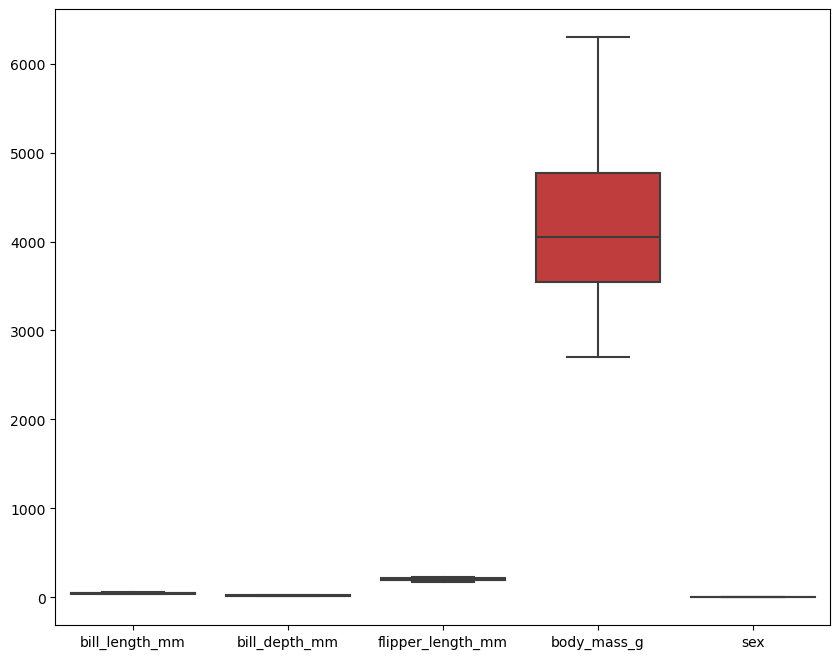

In [19]:
# checking any outliers present in data.

plt.figure(figsize=(10,8))
sns.boxplot(df_penguins)

<Axes: >

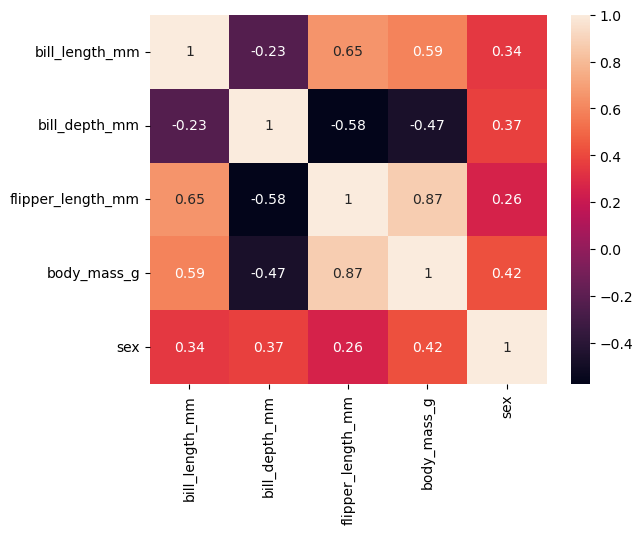

In [20]:
# checking relationship between variables with correlation.

sns.heatmap(df_penguins.corr(), annot=True)

##### Hence corrleation is strong amongst feature we will consider sex as dependent and remaining as independent features.

In [21]:
# Creating independent and dependent feature sets.

X = df_penguins.iloc[:,:-1]
y = df_penguins.iloc[:,-1]

In [22]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [23]:
y

0      1
1      0
2      0
4      0
5      1
      ..
338    0
340    0
341    1
342    0
343    1
Name: sex, Length: 333, dtype: int64

In [24]:
# splitting data in train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((249, 4), (84, 4), (249,), (84,))

#### 3.0 Model making with Logistic Regression (without Hyperparameter Tuning)

In [26]:
# training regression model by creating instance

log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [27]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [31]:
# checking accuracy with confusion_matrix, accuracy_score and classification_report

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [32]:
confusion_matrix(y_test, y_pred)

array([[36,  9],
       [ 3, 36]], dtype=int64)

In [33]:
accuracy_score(y_test, y_pred).round(2)

0.86

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        45
           1       0.80      0.92      0.86        39

    accuracy                           0.86        84
   macro avg       0.86      0.86      0.86        84
weighted avg       0.87      0.86      0.86        84



#### Now we have model with accuracy of 87% with default parameters within regression. 

### 4.0 Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [36]:
# selecting parameters for tuning

parameters = {"penalty":['l1','l2','elasticnet'],
              'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
              'C':(0.001,0.01,0.1,1,10,100,1000)}

In [37]:
classifier = GridSearchCV(estimator=log_reg, param_grid=parameters, scoring="accuracy", cv=10)

In [38]:
classifier.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10, 100, 1000),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [39]:
classifier.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [40]:
classifier.best_estimator_

LogisticRegression(C=0.1, solver='newton-cg')

In [41]:
classifier.best_score_.round(2)

0.91

In [42]:
classifier.predict_proba(X_test).round(2)

array([[0.98, 0.02],
       [0.77, 0.23],
       [0.1 , 0.9 ],
       [0.76, 0.24],
       [0.25, 0.75],
       [0.93, 0.07],
       [0.07, 0.93],
       [0.38, 0.62],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.96, 0.04],
       [0.78, 0.22],
       [0.96, 0.04],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.76, 0.24],
       [0.34, 0.66],
       [0.98, 0.02],
       [0.21, 0.79],
       [0.87, 0.13],
       [0.12, 0.88],
       [0.02, 0.98],
       [0.74, 0.26],
       [1.  , 0.  ],
       [0.87, 0.13],
       [0.78, 0.22],
       [0.24, 0.76],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.9 , 0.1 ],
       [0.  , 1.  ],
       [0.91, 0.09],
       [0.29, 0.71],
       [1.  , 0.  ],
       [0.91, 0.09],
       [1.  , 0.  ],
       [0.6 , 0.4 ],
       [0.91, 0.09],
       [0.68, 0.32],
       [0.77, 0.23],
       [0.78, 0.22],
       [0.99, 0.01],
       [0.27, 0.73],
       [0.04,

In [43]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [44]:
confusion_matrix(y_test, y_pred)

array([[40,  5],
       [ 3, 36]], dtype=int64)

In [45]:
accuracy_score(y_test, y_pred).round(2)

0.9

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        45
           1       0.88      0.92      0.90        39

    accuracy                           0.90        84
   macro avg       0.90      0.91      0.90        84
weighted avg       0.91      0.90      0.90        84



### Now with Hyperparameter tuning our accuracy has increased from 86% to 91%.

### Creating pickle file and dumping our model into it.

In [47]:
import pickle

file = open('U:\Data Science Masters Program\Daywise Practice\Logistic Regression E2E Project and Deployment\Model\classifier.pkl','wb')
pickle.dump(classifier,file)
file.close()